# **Spam Likely | An Email Spam Classifier**

#### By Jackson Trader, Diego Lara, Mark Pack, & Alex Bryant
#### CS 46200 - Introduction To Artificial Intelligence

##### [Email Dataset from Kaggle](https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification)

##### [Unseen Dataset from Kaggle](https://www.kaggle.com/datasets/khashayarahmadi/email-spam)

---

## **Import Libraries**

In [42]:
# NumPy and Pandas libraries for numerical computing and organizing data respectively
import numpy as np
import pandas as pd

# Matplotlib and WordCloud for data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# To split data into training and testing sets
from sklearn.model_selection import train_test_split

# For converting text (messages) into number vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning models we will use:
# Baseline Algorithms for this project -> Logistic Regression, Multinomial Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC # Linear SVM because TF-IDF feature vectors have high dimensionality

# For evaluating performance of the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## **Load the Dataset**

In [ ]:
# Loading the dataset into a pandas DataFrame object
df = pd.read_csv("email_spam_dataset.csv")

## **View the Dataset**

In [ ]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Count Columns & Ratio Between Ham vs. Spam Emails

*   The dataset contains 5571 rows of data and 2 columns: Category & Message
*   The dataset is currently unbalanced: 4825 ham (legit) : 747 spam



In [ ]:
print("Columns of dataset:")
print(df.columns)

print("\nRatios between ham and spam: ")
print(df['Category'].value_counts())

Columns of dataset:
Index(['Category', 'Message'], dtype='object')

Ratios between ham and spam: 
Category
ham     4825
spam     747
Name: count, dtype: int64


## **Preprocess the Data**

### Remove Missing Values

In [ ]:
# Removes rows where either Category or Message is missing
df = df.dropna(subset = ['Category', 'Message'])

### Remove Duplicate Rows

In [ ]:
df = df.drop_duplicates()

### Fix Indexing of Dataset After Preprocessing

In [ ]:
df.reset_index(drop = True, inplace = True)

### Change Category Labels (ham = 0, spam = 1)

In [ ]:
df['Category'] = df['Category'].map({
    'ham': 0,
    'spam': 1
})

### Lowercase all Messages

In [ ]:
df['Message'] = df['Message'].str.lower()

### View Dataset Again

In [ ]:
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5152,1,this is the 2nd time we have tried 2 contact u...
5153,0,will ü b going to esplanade fr home?
5154,0,"pity, * was in mood for that. so...any other s..."
5155,0,the guy did some bitching but i acted like i'd...


*   After preprocessing, we now have 5156 rows of data.
*   The dataset is still unbalanced though.

## **Data Visualization**

### Pie Graph of Ratio of Spam vs. Legit Emails

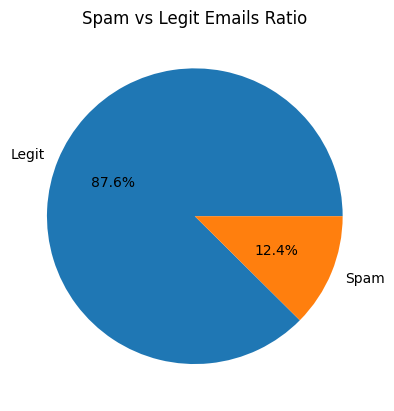

In [ ]:
counts = df['Category'].value_counts()
counts.index = counts.index.map({1: 'Spam', 0: 'Legit'})

counts.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.title("Spam vs Legit Emails Ratio")

# Show the Pie Graph
plt.show()

As you can see the data is unbalanced.

### WordCloud of Most Common Words in Spam vs. Legit

In [ ]:
# Concatenate messages together for each category
spam_text = " ".join(df.loc[df['Category'] == 1, 'Message'].astype(str))
legit_text = " ".join(df.loc[df['Category'] == 0, 'Message'].astype(str))

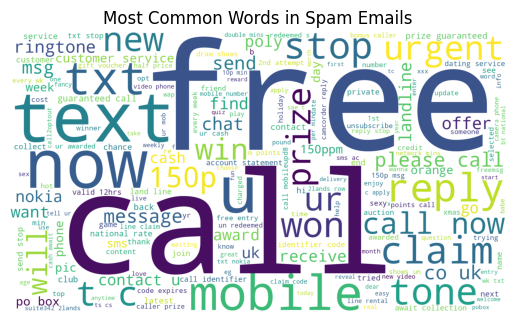

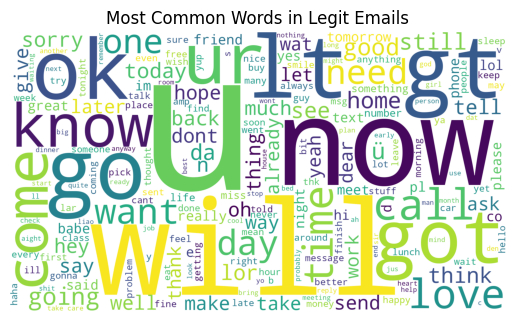

In [ ]:
# Spam WordCloud
wordcloud = WordCloud(
    width = 1920,
    height = 1080,
    background_color = 'white',
    stopwords = STOPWORDS
).generate(spam_text)
plt.title("Most Common Words in Spam Emails")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Legit WordCloud
wordcloud = WordCloud(
    width = 1920,
    height = 1080,
    background_color = 'white',
    stopwords = STOPWORDS
).generate(legit_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Common Words in Legit Emails")
plt.show()


## **Split the Data**

Splitting the data into a train and test sets: <br>
* Train set contains 80% of data.
* Test set contains 20% of data.

In [ ]:
X = df['Message'] # Independent variable
y = df['Category'] # Dependent variable (What we are predicting)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 100, # For reproducability
    stratify = y # Preserve distribution
)

print("Training set size (80%): ", X_train.shape[0])
print("Testing set size (20%): ", X_test.shape[0])

Training set size (80%):  4125
Testing set size (20%):  1032


## **Feature Extraction**

Using TF-IDF because:
* It finds frequent words in a specific email, but rare across all emails.

In [ ]:
# Transform the message data to feature vectors that can be used as input into the models

vectorizer = TfidfVectorizer(
    min_df = 2, # If word appears once then don't include it
    stop_words = 'english'
)

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

## **Scale Model Size & Complexity**

### Effect of Changing TF-IDF's 'max_features' Hyperparameter

'max_features' of TF-IDF means how many words is stored in its vocabulary. The default value is none. (No maximum value)

### Effect of Changing TF-IDF's 'ngram_range' Hyperparameter

n-grams are groups of consecutive words that let the model have more context when analzying, rather than looking at each word independently.

Example:
*   2-gram -> ("claim", "your"), ("free", "car"), ...
*   3-gram -> ("claim", "your", "free"), ("car", "right", "now"), ...




## **Ablation Study**

## **Train the Baseline Models**

These are our baseline algorithms because they are more popualar in the data science world. We also learned about them our lectures, whereas Linear Support Machines were not included in our lectures.

### Logistic Regression

In [ ]:
lr = LogisticRegression()

# Training the Logistic Regression model with the training data
lr.fit(X_train_features, y_train)

LogisticRegression()

### Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB()

# Training the Multinomial Naive Bayes model with the training data
nb.fit(X_train_features, y_train)

MultinomialNB()

## **Train the Primary Model**

### Linear Support Vector Classification

In [ ]:
svm = LinearSVC()

# Training the Linear SVM model with the training data
svm.fit(X_train_features, y_train)

LinearSVC()

## **Evaluation Metrics of Each Model**

Each model gets evaluated on these metrics:
*   Accuracy
*   Precision
*   Recall
*   F1-Score
*   Confusion Matrix

### Evaluation of Logistic Regression

In [ ]:
lr_pred = lr.predict(X_test_features)

print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test, lr_pred))
print("Precision: ", precision_score(y_test, lr_pred))
print("Recall: ", recall_score(y_test, lr_pred))
print("F1 Score: ", f1_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

Logistic Regression
Accuracy:  0.9631782945736435
Precision:  0.9787234042553191
Recall:  0.71875
F1 Score:  0.8288288288288288
Confusion Matrix:
 [[902   2]
 [ 36  92]]


### Evaluation of Naive Bayes

In [ ]:
nb_pred = nb.predict(X_test_features)

print("Multinomial Naive Bayes")
print("Accuracy: ", accuracy_score(y_test, nb_pred))
print("Precision: ", precision_score(y_test, nb_pred))
print("Recall: ", recall_score(y_test, nb_pred))
print("F1 Score: ", f1_score(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

Multinomial Naive Bayes
Accuracy:  0.9796511627906976
Precision:  1.0
Recall:  0.8359375
F1 Score:  0.9106382978723404
Confusion Matrix:
 [[904   0]
 [ 21 107]]


### Evaluation of Linear SVM

In [ ]:
svm_pred = svm.predict(X_test_features)

print("Linear SVM")
print("Accuracy: ", accuracy_score(y_test, svm_pred))
print("Precision: ", precision_score(y_test, svm_pred))
print("Recall: ", recall_score(y_test, svm_pred))
print("F1 Score: ", f1_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

Linear SVM
Accuracy:  0.9854651162790697
Precision:  0.9829059829059829
Recall:  0.8984375
F1 Score:  0.9387755102040817
Confusion Matrix:
 [[902   2]
 [ 13 115]]


## **Comparing the Three Models**

### One Table to Compare the Metrics of the Models

*   Accuracy - Overall correctness (correct predictions / total predictions)
*   Precision - Out of all predicted positives, how many were actually positive
*   Recall - Out of all actual positives, how many did the model find
*   F1-Score - Mean of precision and recall



In [ ]:
comparison_df = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Multinomial Naive Bayes',
        'Linear SVM'
    ],
    'Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, svm_pred)
    ],
    'Precision': [
        precision_score(y_test, lr_pred),
        precision_score(y_test, nb_pred),
        precision_score(y_test, svm_pred)
    ],
    'Recall': [
        recall_score(y_test, lr_pred),
        recall_score(y_test, nb_pred),
        recall_score(y_test, svm_pred)
    ],
    'F1 Score': [
        f1_score(y_test, lr_pred),
        f1_score(y_test, nb_pred),
        f1_score(y_test, svm_pred)
    ],
    'F1 Score': [
        f1_score(y_test, lr_pred),
        f1_score(y_test, nb_pred),
        f1_score(y_test, svm_pred)
    ]
})

# Show the comparison table
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.963178,0.978723,0.718750,0.828829
1,Multinomial Naive Bayes,0.979651,1.000000,0.835938,0.910638
2,Linear SVM,0.985465,0.982906,0.898438,0.938776


### Comparison Summary

Logistic Regression performed the worst out of the three models. It the lowest accuracy, precision, recall, and F1 score.

Multinomial Naive Bayes achieved perfect precision and better results than Logistic Regression.

Linear SVM was produced the best overall performance, even though the precision was less than Multinomial Naive Bayes. It achieved the highest accuracy, recall and F1 score.

#### *Which Model Performed the Best?*

We believe that Linear SVM is the best general purpose model for classifying emails as spam or legit, from the comparisons we have done on the three models in this project. It achieved the best scores other than precision, making it a highly efficient model for classification.

## **Testing on Unseen Emails & Pseudo Copies**

In [ ]:
# Function for testing new emails

models = {
    "Logistic Regression" : lr,
    "Multinomial Naive Bayes" : nb,
    "Linear SVM" : svm
}

def test_emails(unseen_emails):
  for true_category, message in unseen_emails:
    features = vectorizer.transform([message])

    print("\n\nEmail: " + message + "\nTrue Category: " + true_category + "\n")

    for name, model in models.items():
      prediction = model.predict(features)[0]

      if prediction == 1:
        print(name + " Prediction: spam")
      else:
        print(name + " Prediction: legit")

### Using LLMs, We Created Some Unseen Emails

In [ ]:
unseen_emails= [
    ("spam", "Congratulations! You’ve been chosen to receive a limited-time cash reward."),
    ("spam", "URGENT: Update your payment information immediately to avoid suspension."),
    ("legit", "Hi, can you send the updated document by Friday afternoon? Thanks!"),
    ("legit", "Reminder: our meeting is tomorrow at 3pm in the library study room.")
]

test_emails(unseen_emails)



Email: Congratulations! You’ve been chosen to receive a limited-time cash reward.
True Category: spam

Logistic Regression Prediction: legit
Multinomial Naive Bayes Prediction: spam
Linear SVM Prediction: legit


Email: URGENT: Update your payment information immediately to avoid suspension.
True Category: spam

Logistic Regression Prediction: legit
Multinomial Naive Bayes Prediction: spam
Linear SVM Prediction: spam


Email: Hi, can you send the updated document by Friday afternoon? Thanks!
True Category: legit

Logistic Regression Prediction: legit
Multinomial Naive Bayes Prediction: legit
Linear SVM Prediction: legit


Email: Reminder: our meeting is tomorrow at 3pm in the library study room.
True Category: legit

Logistic Regression Prediction: legit
Multinomial Naive Bayes Prediction: legit
Linear SVM Prediction: legit


As you can see, sometimes the models cannot classify the email correctly.

### Using LLMs, We Also Created Paraphrased Existing Emails

Paraphrased from these emails in the dataset using LLMs:

Spam Emails
*   07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow
*   Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!

Legit Emails
*   Sorry, I'll call later in meeting
*   Your gonna have to pick up a $1 burger for yourself on your way home. I can't even move. Pain is killing me.


In [ ]:
paraphrased_emails= [
    ("spam", "We attempted to reach you regarding your response about the free Nokia phone and camcorder. Call 08000930705 now to arrange delivery for tomorrow."),
    ("spam", "Congratulations! You’ve been selected to receive a one-year cinema pass for two people. Call 09061209465 today to claim your free offer before it expires."),
    ("legit", "Apologies, I’m currently in a meeting and will call you back later."),
    ("legit", "You’ll need to grab yourself a one-dollar burger on the way home. I’m in too much pain to get up right now.")
]

test_emails(paraphrased_emails)



Email: We attempted to reach you regarding your response about the free Nokia phone and camcorder. Call 08000930705 now to arrange delivery for tomorrow.
True Category: spam

Logistic Regression Prediction: legit
Multinomial Naive Bayes Prediction: spam
Linear SVM Prediction: legit


Email: Congratulations! You’ve been selected to receive a one-year cinema pass for two people. Call 09061209465 today to claim your free offer before it expires.
True Category: spam

Logistic Regression Prediction: spam
Multinomial Naive Bayes Prediction: spam
Linear SVM Prediction: spam


Email: Apologies, I’m currently in a meeting and will call you back later.
True Category: legit

Logistic Regression Prediction: legit
Multinomial Naive Bayes Prediction: legit
Linear SVM Prediction: legit


Email: You’ll need to grab yourself a one-dollar burger on the way home. I’m in too much pain to get up right now.
True Category: legit

Logistic Regression Prediction: legit
Multinomial Naive Bayes Prediction: leg

Again, sometimes the models cannot classify the email correctly.

## **Try it Out Yourself**

### Defining the Email Classifer Function

In [ ]:
def classify_email(message, model_chosen):
  features = vectorizer.transform([message])

  model_chosen = model_chosen.lower()

  if model_chosen == "lr":
    prediction = lr.predict(features)[0]
  elif model_chosen == "nb":
    prediction = nb.predict(features)[0]
  elif model_chosen == "svm":
    prediction = svm.predict(features)[0]
  else:
    return "Invalid model chosen"

  if prediction == 1:
    return "spam"
  else:
    return "legit"

### Try it Out With Your Own Message

**Some email examples to try out:**

Spam Emails
*   Congratulations! You have won a 1,000 dollar gift card. Click the link below to claim your prize now.
*   Limited time offer!!! No experience required. Sign up today. Earn 100,000 dollars in cash!

Legit Emails
*   Can you review the attached document and send feedback by Friday?
*   Free pizza in the lounge room for everyone attending the group meeting.



In [ ]:
model_chosen = input("Which model would you like to use? (lr, nb, svm):\n")
message = input("\nPut your email message here to classify:\n")

result = classify_email(message, model_chosen)

if result == "Invalid model chosen":
  print("\n" + result)
else:
  print("\nThis is a " + result + " email.")

Which model would you like to use? (lr, nb, svm):
svm

Put your email message here to classify:
Congratulations! You have won a 1,000 dollar gift card. Click the link below to claim your prize now

This is a spam email.
